In [26]:
!pip install tqdm
!pip install googledrivedownloader

In [35]:
import numpy as np
from pathlib import Path
import json, tqdm, random
import matplotlib.pyplot as plt
base_path = Path.cwd()/'.puzzleweb' #You'll find the data here. Change it to whatever you like.
base_path.mkdir(exist_ok = True)
base_path

WindowsPath('F:/ML/SuitCheck/.puzzleweb')

Let's download the files.

In [28]:
from google_drive_downloader import GoogleDriveDownloader as gdd
dpath = base_path/'labelled_cases_v0.1'

if not dpath.exists():
    gdd.download_file_from_google_drive(file_id='11HWXLb8V_7sUmifUDUZn3sz5AWZhZD4d',
                                    dest_path=str(path/'labelled_cases_v0.1.zip'),
                                    unzip=True)
else:
    print("Data already downloaded.")

Data already downloaded.


In [29]:
def loadCase(path):
    with open(path, "r", encoding = "utf-8") as file:
        case = json.loads(file.read())
        return case
    return None

Let's look at the distribution of classes.

In [36]:
files = list((dpath).iterdir())
caseTotal = len(files)
labels = np.zeros(caseTotal)
for i in tqdm.tqdm(range(caseTotal)):
    case = loadCase(files[i])
    labels[i] = case['label']

100%|████████████████████████████████████████████████████████████████████████████| 8493/8493 [00:01<00:00, 6412.43it/s]


In [37]:
print("Nr of cases:", caseTotal)
print("Cost perc. mean:", np.mean(labels))
print("Cost perc. std.:", np.std(labels))

Nr of cases: 8493
Cost perc. mean: 0.3844583774873425
Cost perc. std.: 0.475474547206662


In [38]:
cases1 = len(labels[labels == 1])
cases0 = len(labels[labels == 0])
print("Nr of zero cost cases:", cases1)
print("Nr of full cost cases:", cases0)
print("Nr of other cases:", caseTotal-cases1-cases0)

Nr of zero cost cases: 2975
Nr of full cost cases: 4997
Nr of other cases: 521


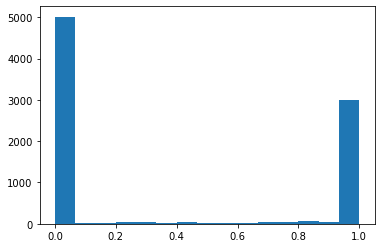

In [39]:
_ = plt.hist(labels, bins = 'auto')
plt.show()

What features does a case have?

In [45]:
caseNr = 0
case = loadCase(files[caseNr])
print("Available keys:", case.keys())

Available keys: dict_keys(['label', 'facts', 'court', 'file_number', 'date', 'type', 'ecli', 'tenor', 'jurisdiction'])


In [48]:
caseNr = random.randrange(0,caseTotal)
case = loadCase(files[caseNr])
idnr = files[caseNr].name.split(".")[0]

print("Id:", idnr)
print("Link:", "https://de.openlegaldata.io/c/"+str(idnr))
print(case['date'], ",", case['court'], ",", case['jurisdiction'], ",", case['file_number'],"\n")
print("Tenor:", case['tenor'], "\n")
print("Label:", case['label'], "\n")
print("Tatbestand:", case['facts'][:500]+"...\n")

Id: 271859
Link: https://de.openlegaldata.io/c/271859
2006-06-08 , Landgericht Bonn , Ordentliche Gerichtsbarkeit , 14 O 31/06 

Tenor: Es wird festgestellt, dass die Beklagte verpflichtet ist, der Klägerin sämtliche aus der verspäteten Zustellung der Ausschreibungsunterlagen Angebot Kläranlage T, Los 1 – Bautechnik – entstandene und entstehende Schäden unter Berücksichtigung der geleisteten Zahlung i. H. v. € 82,50 zu ersetzen.
Die Kosten des Rechtsstreits trägt die Beklagte.
Dieses Urteil ist wegen der Kosten gegen Sicherheitsleistung i. H. v. 120 % des jeweils zu vollstreckenden Betrages vorläufig vollstreckbar. 

Label: 1.0 

Tatbestand: Die Klägerin begehrt die Feststellung der Verpflichtung der Beklagten zum Schadensersatz wegen einer verspätet ausgelieferten Sendung.
Am 04.07.2005 lieferte die Klägerin eine Sendung mit einem Gewicht von 1241 g bei der Filiale der Beklagten in K ein; die Sendung sollte als Expressbrief vor 10:00 Uhr bei dem Empfänger, dem Wasserverband F, ankomme